In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
import collections
import seaborn as sns

In [145]:
data = pd.read_csv('data/results.csv')

In [146]:
'''
Total documents
Total word occurrences
Vocabulary size
Words occurring > 1000 times
Words occurring once
'''

total_documents = data.text.count()
# texts = ''.join(data.text).split()
texts = ''.join(data.text).lower()

In [147]:
# print(collections.Counter([x.lower() for x in ['a', 'b', 'c', 'a', 'b', 'b', 'A', 'B']]))
# pre process text

# REMOVER STOPWORDS?
# remover palavras maior que 3?
# remover palavras com acento?
# removido números

regex = RegexpTokenizer(r'\b[^\d\W]+')
tokens = regex.tokenize(texts)

In [148]:
# considerar números??
# list(filter(lambda x:len(x)>3, tokens))

In [149]:
word_counter = collections.Counter(tokens)
total_word_occurrences = sum(word_counter.values())
vocabulary_size = len(word_counter.keys())

In [150]:
most_frequent_words = len({x: word_counter[x] for x in word_counter if word_counter[x] > 1000})
less_frequent_words = len({x: word_counter[x] for x in word_counter if word_counter[x] == 1})

In [151]:
table1 = pd.DataFrame(data={'names':[
                            'Total Documents', 
                            'Total word ocurrences', 
                            'Vocabulary size', 
                            'Words occurring > 1000 times', 
                            'Words occurring once'
                            ], 
                   'values':[
                           total_documents, 
                           total_word_occurrences, 
                           vocabulary_size, 
                           most_frequent_words, 
                           less_frequent_words
                           ]
                  })
print(table1)
# print(table1.to_string(index=False, header=False))

                          names  values
0               Total Documents     249
1         Total word ocurrences  212999
2               Vocabulary size   22517
3  Words occurring > 1000 times      23
4          Words occurring once   11006


In [152]:
#QUESTAO 2
'''
word, freq, ranking, Pr(%), r.Pr
'''
ranking = 1
words, frequencies, rankings, probs, rprobs = [], [], [], [], []
for k,v in word_counter.most_common():
    prob = round((v/total_word_occurrences) * 100, 2)
    words.append(k)
    frequencies.append(v)
    rankings.append(ranking)
    probs.append(prob)
    rprobs.append(round(ranking * prob / 100, 3))
    ranking += 1

words_statistics = pd.DataFrame()
words_statistics['Word'] = words
words_statistics['Freq'] = frequencies
words_statistics['r'] = rankings
words_statistics['Pr(%)'] = probs
words_statistics['r.Pr'] = rprobs

words_statistics.head(50)

,Word,Freq,r,Pr(%),r.Pr
0,de,10211,1,4.79,0.048
1,a,7499,2,3.52,0.070
2,o,6610,3,3.10,0.093
3,que,6554,4,3.08,0.123
4,e,5734,5,2.69,0.134
5,do,3465,6,1.63,0.098
6,em,3381,7,1.59,0.111
7,da,3012,8,1.41,0.113
8,um,2698,9,1.27,0.114
9,para,2323,10,1.09,0.109


/home/daniyel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


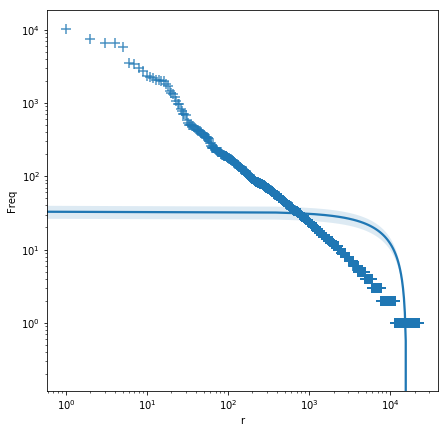

In [153]:
#QUESTAO 3
'''
Plote curvas de rank-frequência (usando escala logarítmica) para palavras e 
bigramas na coleção que você coletou na atividade anterior. 
Quais os melhores valores do parâmetro c para cada curva (5 pts)?
'''

#plot rank-freq palavras

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Freq", words_statistics, ax=ax, marker="+", scatter_kws={"s": 100})

In [154]:
bigrams = nltk.bigrams(tokens)
f_bigrams = nltk.FreqDist(bigrams)

bigrams_statistics = pd.DataFrame()
bigrams_statistics['Bigram'] = list(f_bigrams.keys())
bigrams_statistics['Freq'] = list(f_bigrams.values())
bigrams_statistics['r'] = bigrams_statistics.Freq.rank(ascending=False, method='first')

bigrams_statistics.r = bigrams_statistics.r.astype(int)
bigrams_statistics.sort_values(by=['Freq'], ascending=False)
bigrams_statistics

# bigram_words,  = []
# for i in f_bigrams:
#     print(i, f_bigrams[i])
# f_bigrams

,Bigram,Freq,r
0,"(a, juíza)",3,7601
1,"(juíza, federal)",2,11923
2,"(federal, ivani)",2,11924
3,"(ivani, silva)",2,11925
4,"(silva, da)",4,5401
5,"(da, luz)",4,5402
6,"(luz, de)",2,11926
7,"(de, brasília)",16,842
8,"(brasília, proibiu)",1,24523
9,"(proibiu, em)",1,24524


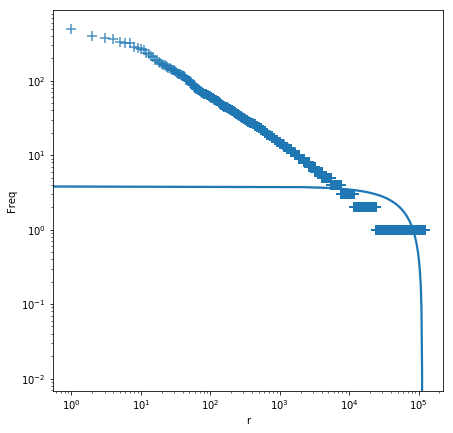

In [155]:
#plot rank-freq bigrams 

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Freq", bigrams_statistics, ax=ax, marker="+", scatter_kws={"s": 100})

In [156]:
# Quais os melhores valores do parâmetro c para cada curva (5 pts)?
round(words_statistics['r.Pr'].mean(), 3)
# words_statistics

0.013

In [157]:
# Reproduza a tabela 4.5 do livro texto considerando a sua coleção (5 pts)
def occurrences_counter(n=0):
    return len(words_statistics[words_statistics.Freq == n])

n_occurrences = list(range(1,11))
predicted_proportion = [round(1/(n*(n+1)), 3) for n in n_occurrences]
actual_proportion = [round(occurrences_counter(n)/vocabulary_size, 3) for n in n_occurrences]
actual_number_words = [occurrences_counter(n) for n in n_occurrences]

proportions = pd.DataFrame()
proportions['Number of Occurrences'] = n_occurrences
proportions['Predicted proportion'] = predicted_proportion
proportions['Actual Proportion'] = actual_proportion
proportions['Actual Number of Words'] = actual_number_words
proportions

,Number of Occurrences,Predicted proportion,Actual Proportion,Actual Number of Words
0,1,0.500,0.489,11006
1,2,0.167,0.165,3713
2,3,0.083,0.081,1818
3,4,0.050,0.050,1132
4,5,0.033,0.035,796
5,6,0.024,0.023,526
6,7,0.018,0.018,413
7,8,0.014,0.015,337
8,9,0.011,0.012,278
9,10,0.009,0.011,251
